A análise de cesta de compras é uma prática comum de ciência de dados implementada por varejistas. 

O objetivo é descobrir as associações entre os itens. 

É muito importante ter uma ideia do que as pessoas tendem a comprar juntas.


Ter uma análise de cesta de compras decente fornece uma visão útil para organizações de corredor, vendas, campanhas de marketing e muito mais.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mercado = pd.read_csv('/content/drive/My Drive/ESTUDO-DE-CASO/mercado/dataset.csv')

In [3]:
mercado.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


O conjunto de dos, mostra de forma organizada que cada linha representa um itemcomprando em um determinado 
dia por um cliente

In [4]:
#Quantidade de linhas e colunas
mercado.shape


(38765, 3)

In [5]:
#Verificar dados ausentes
mercado.isna().sum().sum()

0

In [6]:
mercado.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

preciso converter a coluna data em datatime


In [7]:
#conveter

mercado.Date = pd.to_datetime(mercado.Date)

In [8]:
#Conferir a mudança
mercado.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

Vamos primeiro verificar o número médio de itens vendidos por dia. Uma maneira de fazer isso é agrupar os itens por data e contar os itens. Podemos então traçar o resultado.

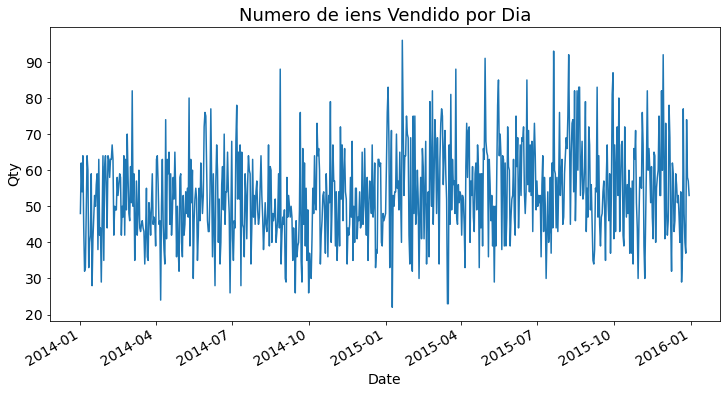

In [9]:
mercado[['Date','itemDescription']].groupby('Date').count().plot(figsize=(12,6), legend=False, fontsize=14)

plt.title('Numero de iens Vendido por Dia', fontsize = 18)
plt.xlabel('Date', fontsize =14)
plt.ylabel('Qty', fontsize = 14)

plt.show()

Vou diminuir a frequenci para melhorar um pouco a resolução da imagem.

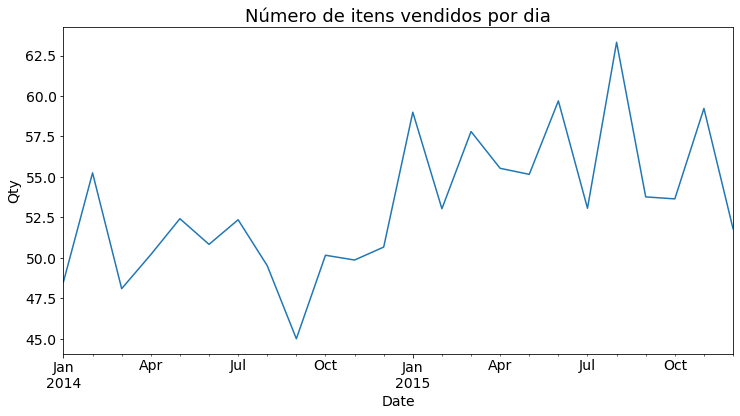

In [10]:
mercado[['Date','itemDescription']].groupby('Date').count().resample('M').mean().plot(figsize = (12,6),legend = False , fontsize = 14)

plt.title ('Número de itens vendidos por dia', fontsize = 18) 
plt.xlabel ('Date', fontsize = 14) 
plt.ylabel ('Qty', fontsize = 14)

plt.show()

Parece que os negócios estão melhorando porque as quantidades dos itens seguem uma tendência geral de aumento.
Cada linha no conjunto de dados representa um item comprado por um cliente em um determinado dia. Se um cliente comprar três itens em uma compra, haverá três linhas com o mesmo número de cliente e data, mas com descrição de item diferente.




Outra medida é o número médio de itens por compra, que pode ser calculado agrupando os itens por número de cliente e data.

In [11]:
item_compra = mercado[['Member_number', 'Date','itemDescription']]\
.groupby(['Member_number','Date']).count().reset_index()

In [12]:
item_compra.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,3
1,1000,2015-03-15,4
2,1000,2015-05-27,2
3,1000,2015-07-24,2
4,1000,2015-11-25,2


O dataframe item_compra mostra o número de itens qm cada compra.Por exemplo:
O cliente 1000 comprou 3 itens em 2014-06-24

In [13]:
#Vamos saber o número médio de itens por compra, gira em torno de 2,5

item_compra.itemDescription.mean()

2.590723785337165

Queremos saber o número de distribuição do número de itens por compra.

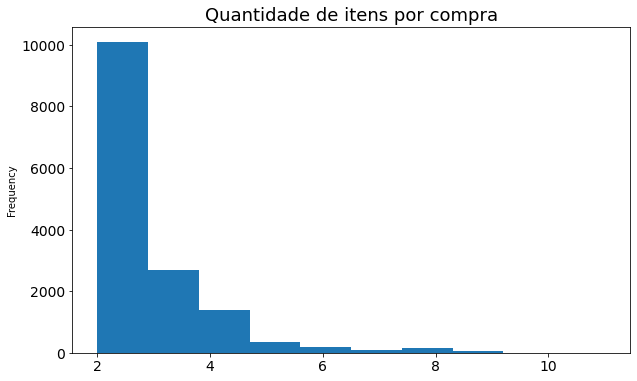

In [14]:
item_compra.itemDescription.plot(figsize = (10,6), kind = 'hist',
                                 legend = False, fontsize = 14)

plt.title('Quantidade de itens por compra', fontsize = 18)

plt.show()

Os clientes têm maior probabilidade de comprar 2–3 itens juntos.


O foco principal da análise da cesta de compras é quais itens são comprados juntos. Uma técnica comum é o aprendizado de regras de associação, que é um método de aprendizado de máquina para descobrir relacionamentos entre variáveis. O algoritmo a priori é um algoritmo frequentemente usado para aprendizagem de regras de associação.
Não entraremos em detalhes sobre algoritmo apriori ou aprendizado de regra de associação neste artigo. Em vez disso, mostrarei uma maneira simples de verificar quais itens são frequentemente comprados juntos.
Vamos primeiro criar um dataframe que contém a lista de itens por compra.

In [17]:
lista_compras = mercado.groupby(['Member_number','Date']).agg({'itemDescription': lambda x: x.ravel().tolist()}).reset_index()

In [18]:
lista_compras

,Member_number,Date,itemDescription
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"
...,...,...,...
14958,4999,2015-05-16,"[butter milk, whipped/sour cream]"
14959,4999,2015-12-26,"[bottled water, herbs]"
14960,5000,2014-09-03,"[fruit/vegetable juice, onions]"
14961,5000,2014-11-16,"[bottled beer, other vegetables]"


Três itens comprados pelo cliente 1000 em 2014–06–24 são leite integral, pastelaria e salgadinho.
Precisamos determinar quais itens existem freqüentemente nas mesmas linhas na coluna “itemDescription”.


Uma maneira é criar combinações de itens em cada linha e contar as ocorrências de cada combinação. Os itertools do python podem ser usados ​​para realizar essa tarefa.
Aqui está um exemplo para a primeira linha.

In [26]:
import itertools

list(itertools.combinations(lista_compras.itemDescription[0], 2))

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('pastry', 'salty snack')]

Existem 3 itens na primeira linha, portanto, temos 3 combinações de pares. Itertools.combinations não retorna combinações repetidas (por exemplo ('pastelaria', 'pastelaria')), que é o que precisamos.

O código a seguir fará essa operação em cada linha e adicionará as combinações a uma lista.

In [39]:
#Vou criar uma lista vazia

combinar_lista = []
for lista in lista_compras.itemDescription:
  combinacao = list(itertools.combinations(lista, 2))
  combinar_lista.append(combinacao)

In [40]:
combinar_lista[:2]

[[('whole milk', 'pastry'),
  ('whole milk', 'salty snack'),
  ('pastry', 'salty snack')],
 [('sausage', 'whole milk'),
  ('sausage', 'semi-finished bread'),
  ('sausage', 'yogurt'),
  ('whole milk', 'semi-finished bread'),
  ('whole milk', 'yogurt'),
  ('semi-finished bread', 'yogurt')]]

Podemos criar uma lista a partir dessa lista de listas usando a função explodir dos pandas, mas primeiro precisamos convertê-la em uma série de pandas.

In [42]:
combinar_contas = pd.Series(combinar_lista).explode().reset_index(drop = True)

In [43]:
combinar_contas[:5]

0              (whole milk, pastry)
1         (whole milk, salty snack)
2             (pastry, salty snack)
3             (sausage, whole milk)
4    (sausage, semi-finished bread)
dtype: object

Agora podemos contar o número de ocorrências de cada combinação usando a função value_counts. Aqui estão as dez combinações mais frequentes:

In [44]:
combinar_contas.value_counts()[:10]

(whole milk, whole milk)          148
(whole milk, rolls/buns)          143
(sausage, whole milk)             131
(other vegetables, whole milk)    130
(whole milk, soda)                128
(whole milk, yogurt)              126
(whole milk, other vegetables)    113
(other vegetables, rolls/buns)    112
(tropical fruit, whole milk)      101
(other vegetables, soda)           95
dtype: int64

O primeiro é uma surpresa porque está se repetindo. Fizemos as combinações sem elementos repetidos.
O conjunto de dados pode conter elementos repating. Por exemplo, se um cliente compra 2 leites em uma compra, deve haver duas filas de leite integral para essa compra.

Podemos confirmar contando o número de leites em cada compra.

In [45]:
leite = mercado[mercado.itemDescription == 'whole milk'].groupby(['Member_number','Date']).count().sort_values(by='itemDescription', ascending=False).reset_index()

In [46]:
leite.head()

,Member_number,Date,itemDescription
0,1994,2015-11-03,4
1,3518,2014-08-02,3
2,4843,2015-05-13,3
3,2736,2015-02-03,3
4,1370,2015-06-28,3


Parece que o que suspeitamos está correto. Por exemplo, o cliente 1994 comprou 4 leites em 2015-11-03.

Assim, faz todo o sentido ver que a combinação mais frequente é leite integral e leite integral.


Devemos nos concentrar em combinações não repetitivas. Por exemplo, a segunda combinação mais frequente é leite integral e pãezinhos / pãezinhos. 

O leite integral parece estar dominando as listas de compras.

Clauder Noronha